# Práctica 2: Introducción a PyTorch

## a) Calculando el gradiente mediante Autograd

En primer lugar, vamos a calcular del gradiente para el perceptrón simple con función de activación sigmoidea que vimos en la teoría. Pero esta vez, en lugar de realizar manualmente el proceso de backpropagation, vamos a usar el módulo `autograd` de PyTorch.

La función $f(x, w)$ a la cual queremos encontrarle el gradiente es:

> $f(\mathbf{x}, \mathbf{w}) = \frac{1}{1 + e^{2-(w_0 x_0 + w_1 x_1 + w_2)}}$

Definimos entonces la función utilizando `torch.tensor` (recordar usar el parámetro `requires_grad = True` para que PyTorch guarde los gradientes) y realizamos la pasada "forward" para los siguientes valores de x y w:

> $\mathbf{x} = (-1, -2)$

> $\mathbf{w} = (2, -3, -3)$



In [ ]:
import torch

x = torch.tensor([-1.,-2.,1.], requires_grad = True)
w = torch.tensor([2.,-3.,-3.], requires_grad = True)

f = 1/(1+torch.exp(-torch.dot(w,x)))

print(f)


tensor(0.7311, grad_fn=<MulBackward0>)


Ahora, utilizando la función `f.backward()` computamos los gradientes $\frac{\partial f}{ \partial \mathbf{x}}$ y $\frac{\partial f}{ \partial \mathbf{w}}$

In [ ]:
f.backward()

In [ ]:
print("Gradiente df/dx = " + str(x.grad))
print("Gradiente df/dw = " + str(w.grad))

Gradiente df/dx = tensor([ 0.3932, -0.5898, -0.5898])
Gradiente df/dw = tensor([-0.1966, -0.3932,  0.1966])


## b) Minimizando una función con Gradient Descent

Ahora, vamos a implementar usar el algorítmo de gradiente descendiente (utilizando Autograd para computar el gradiente) para minimizar la función cuadrática $$f(x) = 2x^2 + x + 4$$

Utilizaremos la implementación `torch.optim.SGD` de gradiente descendiente.



In [ ]:
import matplotlib.pyplot as plt

# Definir la variable que será el parámetro a optimizar
x = torch.tensor([1.], requires_grad=True)

# Definir el optimizador, indicando el parámetro a optimizar y el learning rate
optimizer = torch.optim.SGD([x], lr=.001, maximize=False)

# Acumuladores que usaremos para guardar los valores sucesivos de x, y
f_values = []
x_values = []

# Loop de optimización
for i in range(3000):

    # Setemos en 0 los gradientes de todos los elementos
    optimizer.zero_grad()
       
    # Pasada forward: ejecutar la función a minimizar
    f = 2*(x**2) + x + 4

    print("X = " + str(x) + ", f(x) = " + str(f))

    # Pasada backward: computar los gradientes
    f.backward()

    # Actualizar los pesos dando un paso de gradiente descendiente
    optimizer.step()

    # Guardar los valores para luego plotearlos
    f_values.append(f.data.item())
    x_values.append(x.data.item())

#Vemos que pasa con valores posteriores
f_values_offset = []
x_values_offset = []
for i in range(150):
  f = 2*((x-0.01*i)**2) + (x-0.01*i) + 4
  f_values_offset.append(f.data.item())
  x_values_offset.append(x.data.item()-0.01*i)

X = tensor([1.], requires_grad=True), f(x) = tensor([7.], grad_fn=<AddBackward0>)
X = tensor([0.9950], requires_grad=True), f(x) = tensor([6.9750], grad_fn=<AddBackward0>)
X = tensor([0.9900], requires_grad=True), f(x) = tensor([6.9503], grad_fn=<AddBackward0>)
X = tensor([0.9851], requires_grad=True), f(x) = tensor([6.9257], grad_fn=<AddBackward0>)
X = tensor([0.9801], requires_grad=True), f(x) = tensor([6.9014], grad_fn=<AddBackward0>)
X = tensor([0.9752], requires_grad=True), f(x) = tensor([6.8772], grad_fn=<AddBackward0>)
X = tensor([0.9703], requires_grad=True), f(x) = tensor([6.8533], grad_fn=<AddBackward0>)
X = tensor([0.9654], requires_grad=True), f(x) = tensor([6.8295], grad_fn=<AddBackward0>)
X = tensor([0.9606], requires_grad=True), f(x) = tensor([6.8059], grad_fn=<AddBackward0>)
X = tensor([0.9557], requires_grad=True), f(x) = tensor([6.7825], grad_fn=<AddBackward0>)
X = tensor([0.9509], requires_grad=True), f(x) = tensor([6.7593], grad_fn=<AddBackward0>)
X = tensor([0.9461

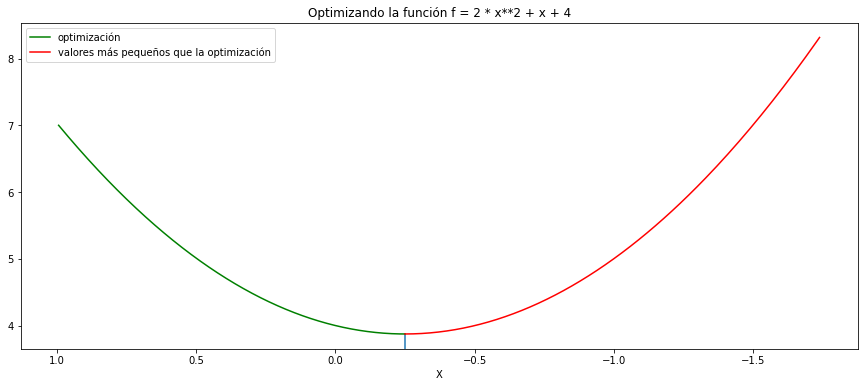

In [ ]:
# Ploteo los valores
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.set_title("Optimizando la función f = 2 * x**2 + x + 4")
axes.set_xlabel("X")
axes.axvline(-.25,0,.045)
axes.plot(x_values,f_values, c='green',label='optimización')
axes.plot(x_values_offset,f_values_offset, c='red', label='valores más pequeños que la optimización')
axes.invert_xaxis()
plt.legend()

Con línea celeste se ve el punto x=-.25, donde converge la optimización

# c) Implementando un MLP en PyTorch para predicción del procentaje de grasa corporal

Contamos con una base de datos [1] de 252 mediciones del porcentaje de grasa corporal de 252 personas diferentes, el cual puede ser estimado mediante otras características, como la edad, el peso, y mediciones en diferentes partes del cuerpo. A partir de estos datos se pretende desarrollar un sistema que permita predecir dicho porcentaje a partir de las características.

[1]: Olson, R.S., La Cava, W., Orzechowski, P. et al. PMLB: a large benchmark suite for machine learning evaluation and comparison. BioData Mining 10, 36 (2017). https://epistasislab.github.io/pmlb/profile/560_bodyfat.html

Antes de comenzar, vamos a instalar el paquete de Python que contiene la base de datos:

Ahora vamos a generar un histograma de todas las mediciones del porcentaje con todos los datos disponibles:

In [ ]:
pip install pmlb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Fila de ejemplo:
['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target']
[  1.0708  23.     154.25    67.75    36.2     93.1     85.2     94.5
  59.      37.3     21.9     32.      27.4     17.1   ]


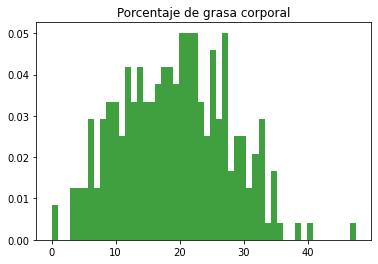

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pmlb import fetch_data

# Importamos el dataset
body_fat = fetch_data('560_bodyfat')
body_fat.describe()

# Extraigo los datos (features) y los porcentajes (etiquetas a predecir)
data = body_fat.loc[:, body_fat.columns != 'target'].to_numpy()
percentages = body_fat.loc[:, body_fat.columns == 'target'].to_numpy()

data = data.astype(np.float32)
percentages = percentages.astype(np.float32)

print("Fila de ejemplo:")
print(list(body_fat.columns))
print(data[0,:])

# Dibujo un histograma del porcentaje de grasa corporal usando todos los datos
_ = plt.hist(percentages, 50, density=True, facecolor='g', alpha=0.75)
_ = plt.title("Porcentaje de grasa corporal")


Particionamos los datos en entrenamiento y prueba usando la función `sklearn.model_selection.train_test_split`

In [ ]:
 from sklearn.model_selection import train_test_split
 
 # Particiono los datos en entrenamiento y prueba usando el método de scikitlearn
 X_train, X_test, y_train, y_test = train_test_split(data, percentages, test_size=0.33, random_state=42)

Ahora implementaremos en PyTorch un Perceptrón multicapa que usaremos como regresor del porcentaje de grasa corporal (ejemplo basado en el curso de [RPI](https://rpi.analyticsdojo.com/)).

El perceptrón deberá contar con 3 capas:
- Las dos primeras con 200 neuronas, y deberán usar la función de activación ReLU.
- La última con una única neurona cuya salida sea un valor escalar que corresponda al porcentaje de grasa corporal estimado de la persona, que no deberá utilizar ninguna función de activación.

Algunas clases de PyTorch que resultarán útiles para implementar el modelo, son:
- `torch.nn.Linear`: Implementa una capa totalmente conectada. Es necesario especificarle el número de parámetros de entrada y de salida.
- `torch.nn.functional.relu`: Implementa la función de activación ReLU.

Además, utilizaremos el optimizador `torch.optim.Adam` y la función de pérdida `torch.nn.MSELoss` (error cuadrático medio).






Epoch 100, loss = 18.4488
Epoch 200, loss = 16.9805
Epoch 300, loss = 15.2249
Epoch 400, loss = 14.1595
Epoch 500, loss = 13.3989
Epoch 600, loss = 10.9151
Epoch 700, loss = 13.0011
Epoch 800, loss = 9.21819
Epoch 900, loss = 8.87998
Epoch 1000, loss = 8.1609
Epoch 1100, loss = 14.5183
Epoch 1200, loss = 5.14956
Epoch 1300, loss = 4.36532
Epoch 1400, loss = 3.80175
Epoch 1500, loss = 6.24118
Epoch 1600, loss = 2.66705
Epoch 1700, loss = 1.90591
Epoch 1800, loss = 4.87602
Epoch 1900, loss = 1.82123
Epoch 2000, loss = 3.10012
Epoch 2100, loss = 0.774971
Epoch 2200, loss = 0.876544
Epoch 2300, loss = 1.3072
Epoch 2400, loss = 2.99739
Epoch 2500, loss = 0.636522
Epoch 2600, loss = 0.561638
Epoch 2700, loss = 0.483122
Epoch 2800, loss = 0.937503
Epoch 2900, loss = 0.818693
Epoch 3000, loss = 0.551205
Epoch 3100, loss = 0.337267
Epoch 3200, loss = 4.00413
Epoch 3300, loss = 2.02761
Epoch 3400, loss = 0.101963
Epoch 3500, loss = 1.55203
Epoch 3600, loss = 0.345249
Epoch 3700, loss = 0.0972292

Text(0.5, 1.0, 'Función de pérdida durante el entrenamiento')

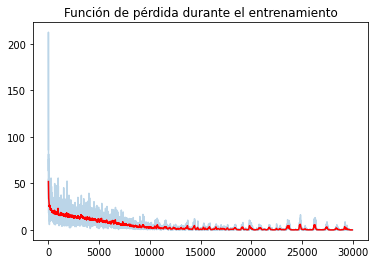

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Tamaño del batch de entrenamiento
batch_size = 32

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 1e-3

class Net(torch.nn.Module):
    def __init__(self, input_features, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_features, size_hidden, bias=False)
        self.hidden2 = nn.Linear(size_hidden, size_hidden)
        self.out = nn.Linear(size_hidden,n_output)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x

# Definimos el modelo del perceptrón
net = Net(data.shape[1], 200, 1)

# Construimos el optimizador, y le indicamos que los parámetros a optimizar 
# son los del modelo definido: net.parameters()

optimizer = torch.optim.Adam(net.parameters() , lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = nn.MSELoss()

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan 
# ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a un batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# Número de épocas
num_epochs = 5000

# Lista en la que iremos guardando el valor de la función de pérdida en cada 
# etapa de entrenamiento
loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    total_loss = 0.0
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer.zero_grad()

        # Realizo la pasada forward por la red
        loss = criterion(net.forward(x), y)
        
        # Realizo la pasada backward por la red        
        loss.backward()
        
        # Actualizo los pesos de la red con el optimizador
        optimizer.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

        # Acumulo la loss del minibatch
        total_loss += loss.item() * y.size(0)

    # Normalizo la loss total   
    total_loss/= len(loader.dataset)

    # Muestro el valor de la función de pérdida cada 100 iteraciones        
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, total_loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento")

MSE medio en training: 0.026507491
MSE medio en test: 32.352757


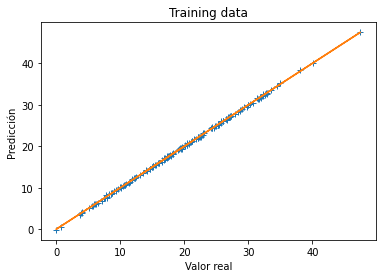

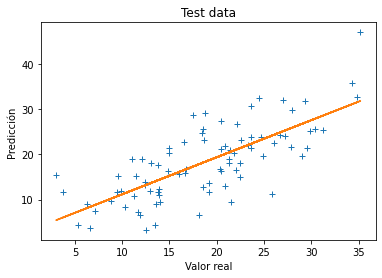

In [ ]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm

# Definimos un método para mostrar las predicciones como un scatter plot 
# y graficamos la recta de regresión para esos datos.
def plotScatter(x_data, y_data, title, fit_line=True):
  plt.figure()
  
  plt.plot(x_data, y_data, '+')
  plt.xlabel('Valor real')
  plt.ylabel('Predicción')
  plt.title(title)

  if fit_line:
    X, Y = x_data.reshape(-1,1), y_data.reshape(-1,1)
    plt.plot( X, LinearRegression().fit(X, Y).predict(X) )

# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py = net(torch.FloatTensor(X_train))
y_pred_train = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net(torch.FloatTensor(X_test))
y_pred_test = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data")

print ("MSE medio en training: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test: " + str(((y_test - y_pred_test)**2).mean()))

---

# Entregable 
1. Encontrar el mínimo de la función *f* definida en el apartado b). Para ello, deberán encontrar primero la derivada *f'(x)* de forma analítica, y utilizarla para computar el mínimo de la función. Posteriormente, deberán corrobarar que el valor coincida con el que obtuvieron optimizando la función con gradiente descendiente. 

2. Compara el rendimiento de 3 perceptrones multicapa que varíen en la cantidad de neuronas en sus capas intermedia. Probar colocando 2, 10 y 200 neuronas en dichas capas, al entrenar los perceptrones durante 5000 épocas. Mostrar los resultados utilizando:

* los gráficos de dispersión con la recta de regresión
* el error medio en los datos de entrenamiento y test

  Analizar la relación entre dichos resultados y la cantidad de neuronas que posee el perceptrón.
 

### Respuesta punto 1

$f(x) = 2x^2 + x + 4$

$\frac{df}{dx}=4 x + 1$

$\frac{df}{dx}= 0$

$4 x + 1 = 0$

$x = -\frac{1}{4}$

Encontramos de manera analitica el minimo de la funcion *f* en el punto x = $-\frac{1}{4}$. Utilizando el descenso de gradiente a partir de la funcion torch.optim.SGD del framework pytorch, encontramos que luego de 3000 iteraciones, con un learning rate de 0.001 y con una semilla inicial de x = 0, el minimo de la funcion converge en x = -0.25, el cual coincide con el minimo calculado de forma teorica. Para extender el estudio, llevamos los valores de x más allá de este óptimo y, efectivamente, el valor de la función comienza a aumentar (dado que es una función cuadrática convexa)

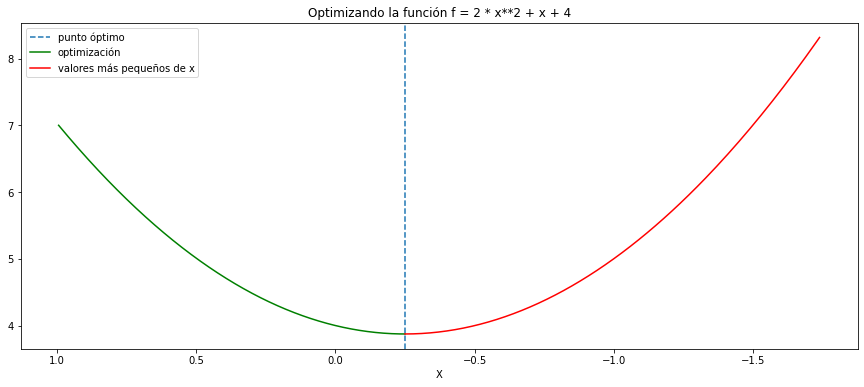

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.set_title("Optimizando la función f = 2 * x**2 + x + 4")
axes.set_xlabel("X")
axes.axvline(-.25,0,1, label='punto óptimo', ls='--')
axes.plot(x_values,f_values, c='green',label='optimización')
axes.plot(x_values_offset,f_values_offset, c='red', label='valores más pequeños de x')
axes.invert_xaxis()
plt.legend()

In [ ]:
from tqdm import tqdm
from typing import Tuple
import pandas as pd

In [ ]:
def experimento_hidden_layers(n_hidden_neurons:int, num_epochs:int=5000) -> Tuple[dict, torch.nn.Module, dict]:
  """Experimento de MLP con 2 hidden layers con igual número de neuronas en cada una.

  Args:
      n_hidden_neurons (int): controla el número de neuronas en las hidden layers
      num_epochs (int, optional): controla el número de épocas de entrenamiento. Defaults to 5000.

  Returns:
      tuple[dict, torch.nn.Module, dict]: dict con scores en train, modelo entrenado, dict con scores en test
  """
  net = Net(data.shape[1], n_hidden_neurons, 1)
  optimizer = torch.optim.Adam(net.parameters() , lr=learning_rate)
  criterion = nn.MSELoss()
  dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())
  loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

  loss_list = []
  loss_tracker={str(n_hidden_neurons):[]}
  mse_tracker={str(n_hidden_neurons):[]}

  # Bucle de entrenamiento
  for i in tqdm(range(num_epochs)):

      total_loss = 0.0
      for x, y in loader:
          
          optimizer.zero_grad()
          loss = criterion(net.forward(x), y)   
          loss.backward()
          optimizer.step()

          loss_list.append(loss.data.item())
          total_loss += loss.item() * y.size(0)


      # Normalizo la loss total   
      total_loss/= len(loader.dataset)
      loss_tracker[str(n_hidden_neurons)].append(total_loss)

      #Calculo score en test
      py = net(torch.FloatTensor(X_test))
      y_pred_test = py.cpu().detach().numpy()
      mse_tracker[str(n_hidden_neurons)].append(((y_test-y_pred_test)**2).mean())

  return loss_tracker, net, mse_tracker

In [ ]:
def plotScatter(x_data, y_data, title, ax, fit_line=True):
  ax.plot(x_data, y_data, '+')
  ax.set_xlabel('Valor real')
  ax.set_ylabel('Predicción')
  ax.set_title(title)

  if fit_line:
    X, Y = x_data.reshape(-1,1), y_data.reshape(-1,1)
    ax.plot( X, LinearRegression().fit(X, Y).predict(X) )


def plot(X_train, y_train, X_test, y_test, ax, title, net):
  """
  Funcion wrapper para plotear scores en train y en test
  """
  # Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
  py = net(torch.FloatTensor(X_train))
  y_pred_train = py.cpu().detach().numpy()
  plotScatter(y_train, y_pred_train, f"Training data | {title}", ax=ax[0])

  # Dibujamos el ground truth vs las predicciones en los datos de test
  py = net(torch.FloatTensor(X_test))
  y_pred_test = py.cpu().detach().numpy()
  plotScatter(y_test, y_pred_test, f"Test data | {title}", ax=ax[1])

  mse_train =  str(((y_train - y_pred_train)**2).mean())
  mse_test  =  str(((y_test - y_pred_test)**2).mean())

  return mse_train, mse_test

Corremos los modelos con diferente número de neuronas (esta celda puede tardar en correr)

In [ ]:
tracker_2, net_2, mse_tracker_2       = experimento_hidden_layers(2)
tracker_10, net_10, mse_tracker_10    = experimento_hidden_layers(10)
tracker_25, net_25, mse_tracker_25    = experimento_hidden_layers(25)
tracker_50, net_50, mse_tracker_50    = experimento_hidden_layers(50)
tracker_100, net_100, mse_tracker_100 = experimento_hidden_layers(100)
tracker_200, net_200, mse_tracker_200 = experimento_hidden_layers(200)
tracker_500, net_500, mse_tracker_500 = experimento_hidden_layers(500)

100%|██████████| 5000/5000 [04:46<00:00, 17.45it/s]


Vemos los scores, a la izquierda en train y a la derecha en test

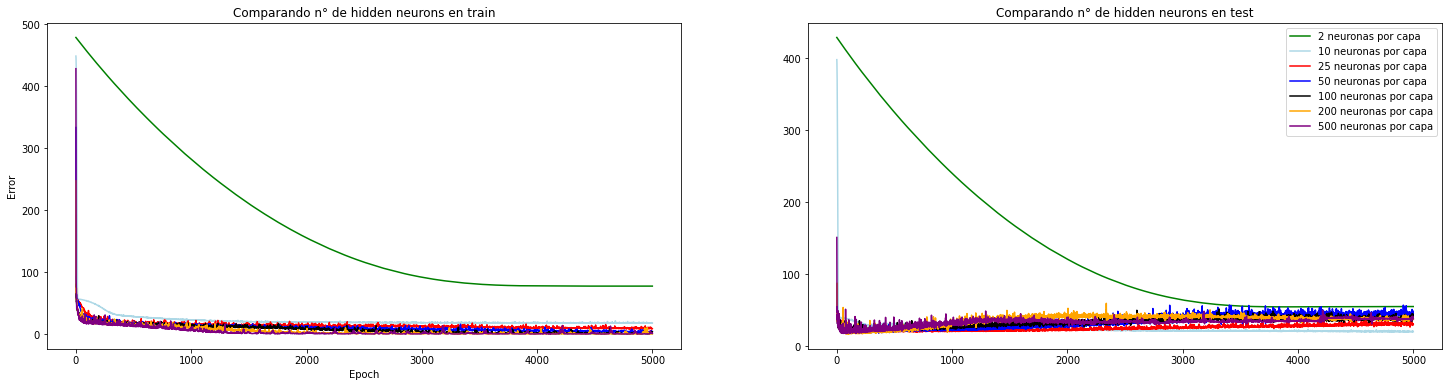

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
axes[0].set_title("Comparando n° de hidden neurons en train")
axes[1].set_title("Comparando n° de hidden neurons en test")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel('Error')
epochs = range(5000)
axes[0].plot(epochs,[x for x in tracker_2.values()][0], c='green',label='2 neuronas por capa')
axes[0].plot(epochs,[x for x in tracker_10.values()][0], c='lightblue',label='10 neuronas por capa')
axes[0].plot(epochs,[x for x in tracker_25.values()][0], c='red',label='25 neuronas por capa')
axes[0].plot(epochs,[x for x in tracker_50.values()][0], c='blue',label='50 neuronas por capa')
axes[0].plot(epochs,[x for x in tracker_100.values()][0], c='black',label='100 neuronas por capa')
axes[0].plot(epochs,[x for x in tracker_200.values()][0], c='orange',label='200 neuronas por capa')
axes[0].plot(epochs,[x for x in tracker_500.values()][0], c='purple',label='500 neuronas por capa')
axes[1].plot(epochs,[x for x in mse_tracker_2.values()][0], c='green',label='2 neuronas por capa')
axes[1].plot(epochs,[x for x in mse_tracker_10.values()][0], c='lightblue',label='10 neuronas por capa')
axes[1].plot(epochs,[x for x in mse_tracker_25.values()][0], c='red',label='25 neuronas por capa')
axes[1].plot(epochs,[x for x in mse_tracker_50.values()][0], c='blue',label='50 neuronas por capa')
axes[1].plot(epochs,[x for x in mse_tracker_100.values()][0], c='black',label='100 neuronas por capa')
axes[1].plot(epochs,[x for x in mse_tracker_200.values()][0], c='orange',label='200 neuronas por capa')
axes[1].plot(epochs,[x for x in mse_tracker_500.values()][0], c='purple',label='500 neuronas por capa')
plt.legend()

Haciendo un zoom-in para ver más en detalle los resultados

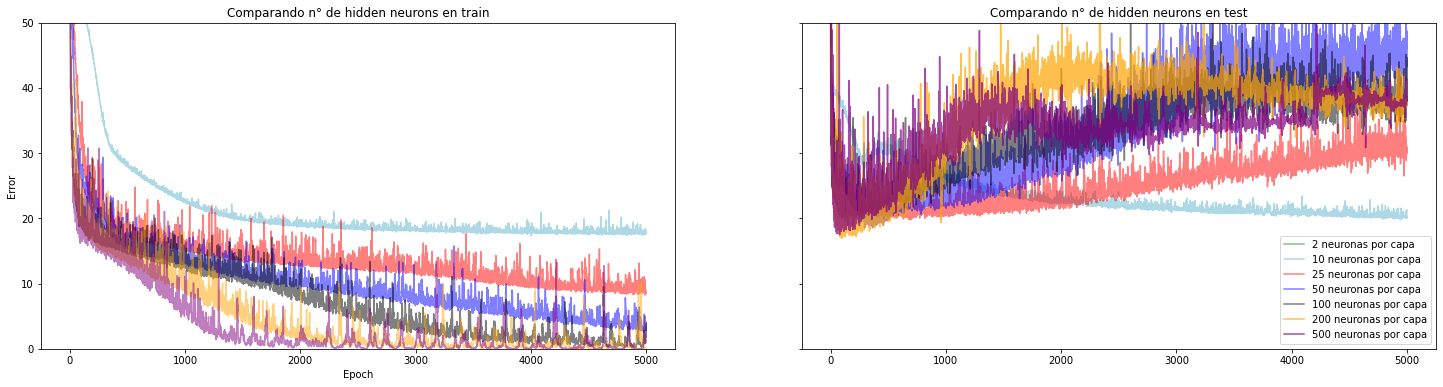

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,6), sharey=True)
axes[0].set_title("Comparando n° de hidden neurons en train")
axes[1].set_title("Comparando n° de hidden neurons en test")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel('Error')
axes[0].set_ylim(0,50)
axes[1].set_ylim(0,50)
epochs = range(5000)
axes[0].plot(epochs,[x for x in tracker_2.values()][0], c='green',label='2 neuronas por capa', alpha=.5)
axes[0].plot(epochs,[x for x in tracker_10.values()][0], c='lightblue',label='10 neuronas por capa')
axes[0].plot(epochs,[x for x in tracker_25.values()][0], c='red',label='25 neuronas por capa', alpha=.5)
axes[0].plot(epochs,[x for x in tracker_50.values()][0], c='blue',label='50 neuronas por capa', alpha=.5)
axes[0].plot(epochs,[x for x in tracker_100.values()][0], c='black',label='100 neuronas por capa', alpha=.5)
axes[0].plot(epochs,[x for x in tracker_200.values()][0], c='orange',label='200 neuronas por capa', alpha=.5)
axes[0].plot(epochs,[x for x in tracker_500.values()][0], c='purple',label='500 neuronas por capa', alpha=.5)
axes[1].plot(epochs,[x for x in mse_tracker_2.values()][0], c='green',label='2 neuronas por capa', alpha=.5)
axes[1].plot(epochs,[x for x in mse_tracker_10.values()][0], c='lightblue',label='10 neuronas por capa')
axes[1].plot(epochs,[x for x in mse_tracker_25.values()][0], c='red',label='25 neuronas por capa', alpha=.5)
axes[1].plot(epochs,[x for x in mse_tracker_50.values()][0], c='blue',label='50 neuronas por capa', alpha=.5)
axes[1].plot(epochs,[x for x in mse_tracker_100.values()][0], c='black',label='100 neuronas por capa', alpha=.5)
axes[1].plot(epochs,[x for x in mse_tracker_200.values()][0], c='orange',label='200 neuronas por capa', alpha=.7)
axes[1].plot(epochs,[x for x in mse_tracker_500.values()][0], c='purple',label='500 neuronas por capa', alpha=.7)
plt.legend()

,Neuronas,Errores en Train,Errores en Test
0,2,77.30495,55.060658
1,10,17.55871,20.101435
2,25,9.288053,30.302597
3,50,2.9433806,46.051647
4,100,1.6416738,37.28195
5,200,0.04113675,37.494354
6,500,0.6114851,38.3522


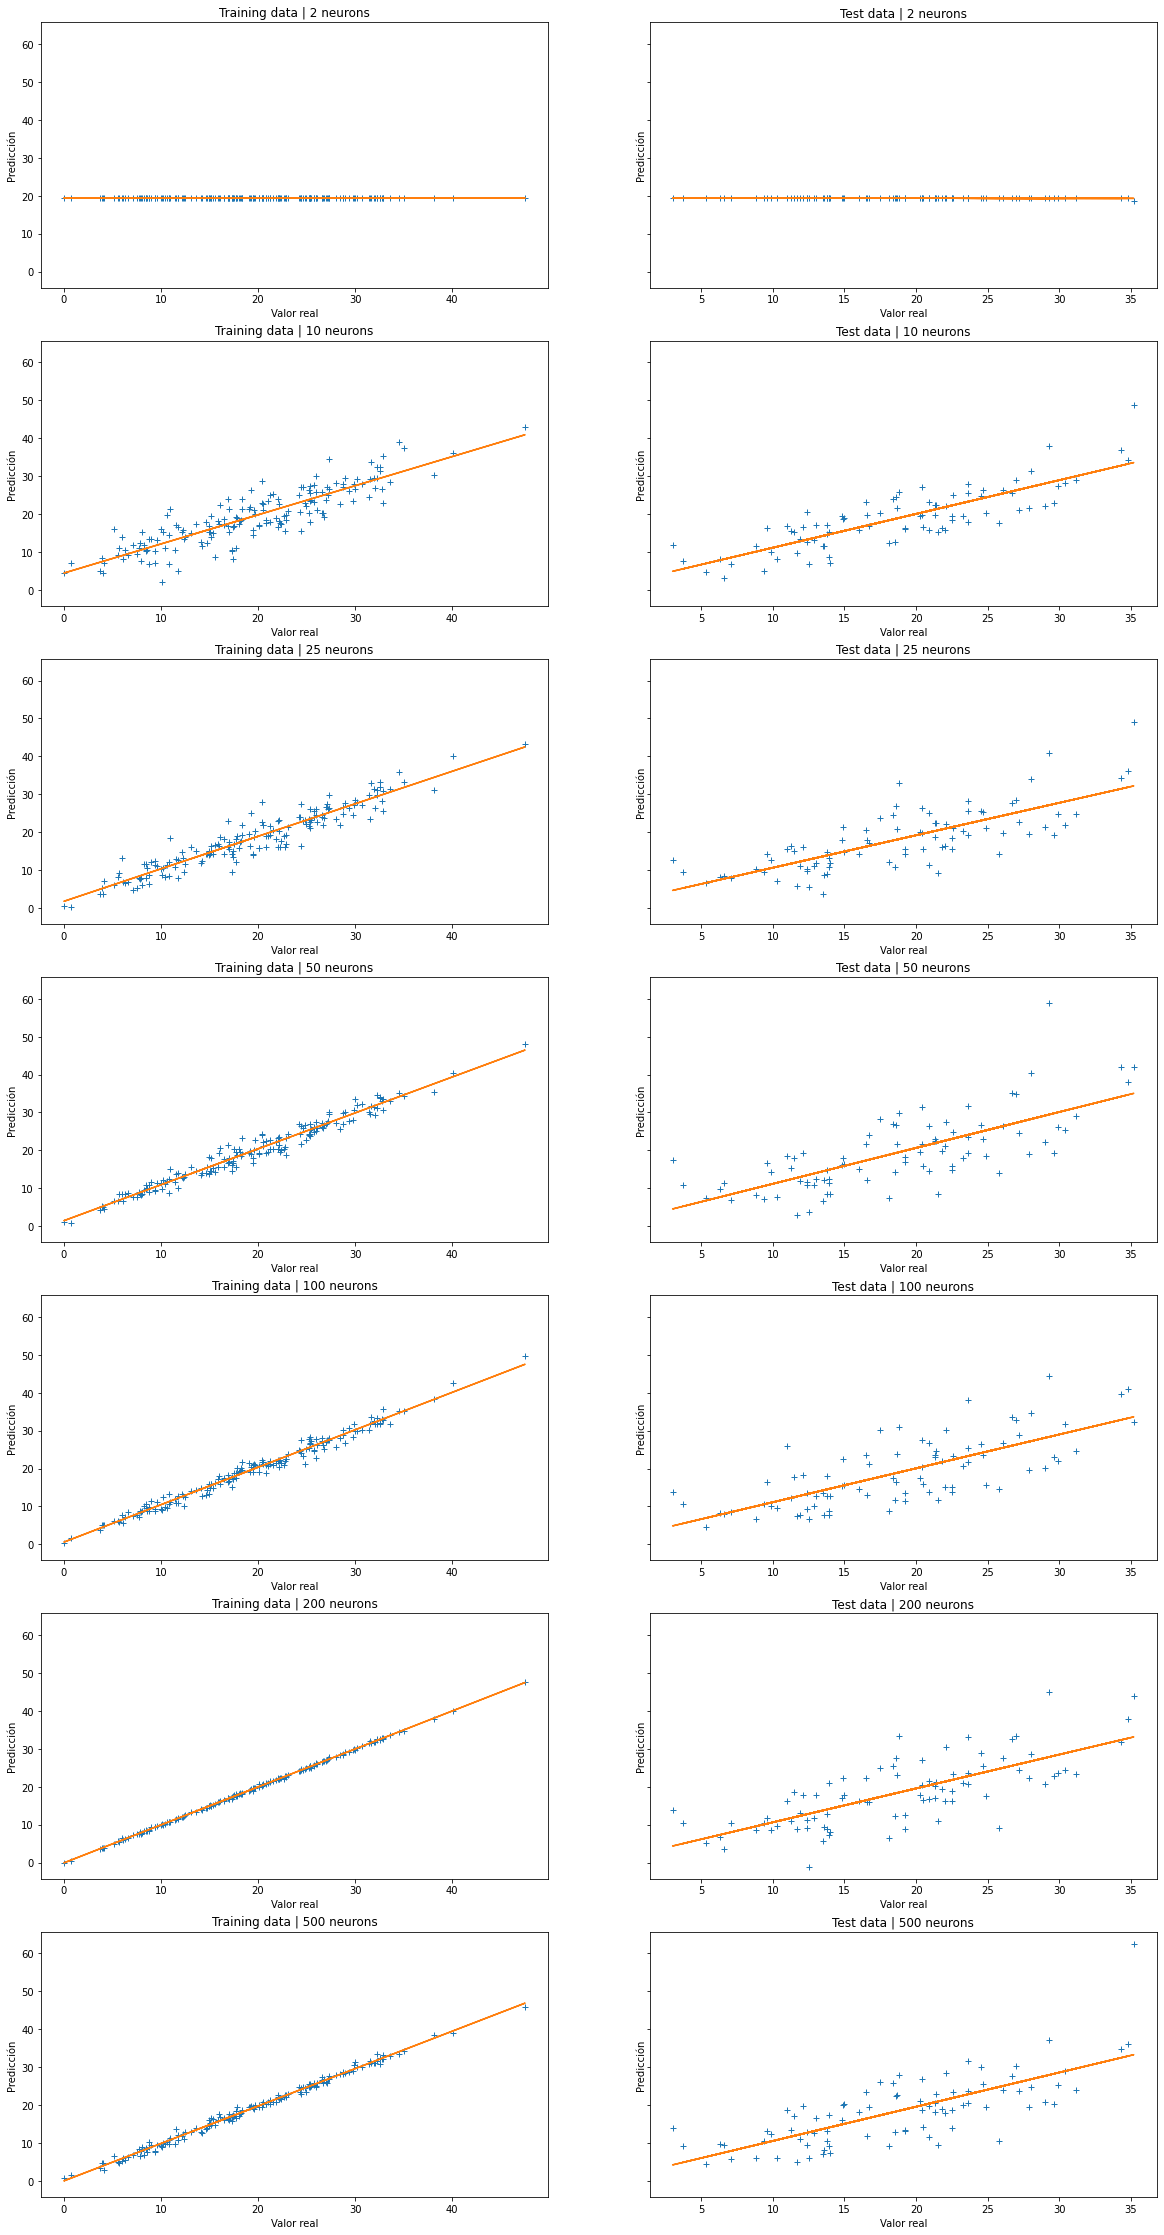

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20,40), sharey=True)

mse_train2, mse_test2 = plot(
    X_train, y_train, X_test, y_test, axes[0], "2 neurons", net_2
)
mse_train10, mse_test10 = plot(
    X_train, y_train, X_test, y_test, axes[1], "10 neurons", net_10
)
mse_train25, mse_test25 = plot(
    X_train, y_train, X_test, y_test, axes[2], "25 neurons", net_25
)
mse_train50, mse_test50 = plot(
    X_train, y_train, X_test, y_test, axes[3], "50 neurons", net_50
)
mse_train100, mse_test100 = plot(
    X_train, y_train, X_test, y_test, axes[4], "100 neurons", net_100
)
mse_train200, mse_test200 = plot(
    X_train, y_train, X_test, y_test, axes[5], "200 neurons", net_200
)
mse_train500, mse_test500 = plot(
    X_train, y_train, X_test, y_test, axes[6], "500 neurons", net_500
)

pd.DataFrame({
    'Neuronas':[2,10,25,50,100,200,500],
    'Errores en Train':[mse_train2, mse_train10, mse_train25, mse_train50, mse_train100, mse_train200, mse_train500],
    'Errores en Test':[mse_test2, mse_test10, mse_test25, mse_test50, mse_test100, mse_test200, mse_test500]
})

#Concluciones importantes


* Vemos como a medida que aumentamos el número de neuronas, las instancias de train comienzan a caer más cerca de la línea de 45°, pero las instancias de test van acumulando mayor error (en los casos de redes con 25 o más neuronas por capa). Esto quiere decir que las redes con gran cantidad de neuronas terminan overfitteando, esto se puede deber a que estamos trabajando con un dataset con solo 252 instancias. Para evitar esto habría que utilizar alguna técnica de regularización.
* Vemos que la red que mejor performa al final del las 5000 epochs es la de 10 neuronas, pero si vamos al gráfico que nos muestra el error por época en test, vemos que las redes que tiene 200 y 500 neuronas performan mejor al comienzo, por lo que sería recomendable utilizar estas últimas y reducir drásticamente la cantidad de epochs (ganando así eficiencia)

In [ ]:
#Entrenamos la red de 500 y 200 neuronas solo por 100 epochs
tracker_500_100it, net_500_100it, mse_tracker_500_100it = experimento_hidden_layers(500,100)
tracker_200_100it, net_200_100it, mse_tracker_200_100it = experimento_hidden_layers(200,100)

100%|██████████| 100/100 [00:01<00:00, 88.84it/s]


In [ ]:
#Obtenemos el mejor resultado en test
print(f'MIN de la red con 200 neuronas y 100 epochs: {min([x for x in mse_tracker_200_100it.values()][0])}')
print(f'MIN de la red con 500 neuronas y 100 epochs: {min([x for x in mse_tracker_500_100it.values()][0])}')

MIN de la red con 200 neuronas y 100 epochs: 17.584314346313477
MIN de la red con 500 neuronas y 100 epochs: 17.0307559967041


**_Disclaimer_**<br>
_Las comparaciones para elegir el mejor modelo se están haciendo sobre datos de test directamente, lo que podría llevar a un sobreajuste teórico sobre este conjunto de instancias, idealmente esto debería hacerse sobre datos de validación y luego usar datos de test solo como última evaluación._